In [64]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses
import datetime
import time

from tensorflow import keras
from tensorflow.keras import Model,losses
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, Activation, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D, Dropout, Add, MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras import datasets, layers, models, losses
from __future__ import absolute_import, division, print_function, unicode_literals

In [65]:
(x_train,y_train),(x_test,y_test) = datasets.fashion_mnist.load_data()

In [66]:
print('The number of images in training dataset is',x_train.shape[0])
print('The number of images in training dataset is',x_test.shape[0])

The number of images in training dataset is 60000
The number of images in training dataset is 10000


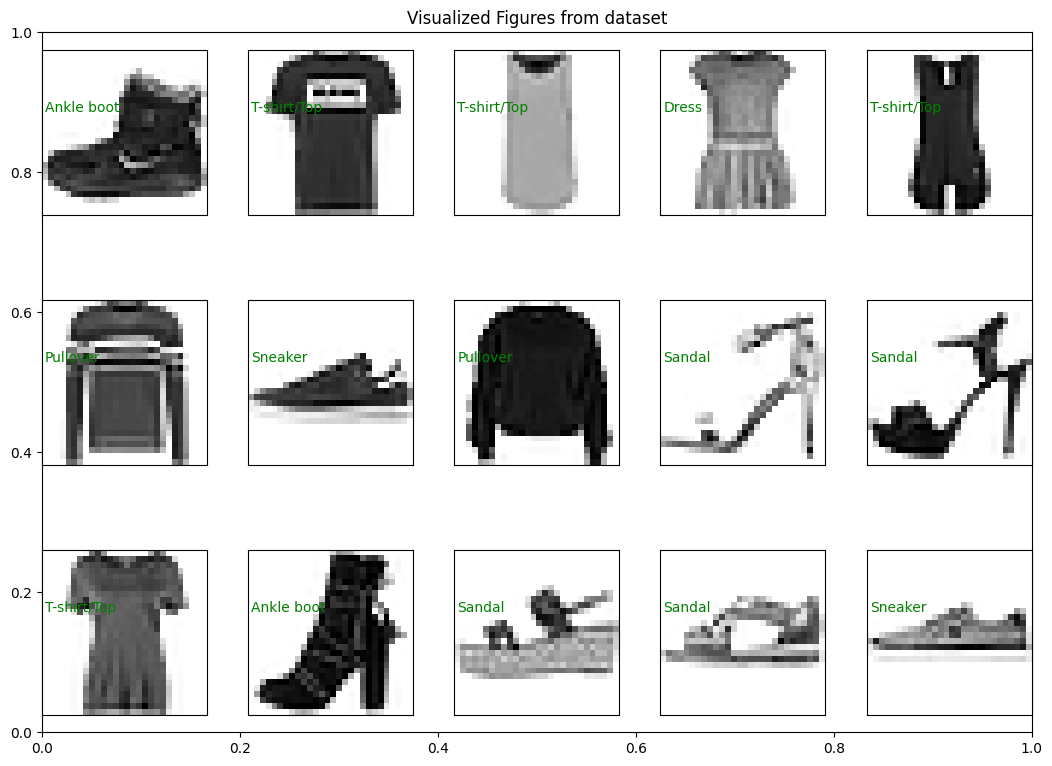

In [67]:
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig = plt.figure(figsize=(11, 7))
fig.subplots_adjust(left=0, bottom=0, top=1, hspace=0.25, wspace=0.25)
plt.title('Visualized Figures from dataset')
for i in range(15):
  ax = fig.add_subplot(3, 5, i + 1, xticks=[],yticks=[])
  ax.imshow(x_train[i],cmap=plt.cm.gray_r, interpolation='nearest')
  ax.text(0, 10, class_names[y_train[i]], color='green')

In [68]:
print('The image shape is', x_train[0].shape, 'for training dataset')
print('The image shape is', x_test[0].shape, 'for testing dataset')

The image shape is (28, 28) for training dataset
The image shape is (28, 28) for testing dataset


In [69]:
x_train = x_train[:, :, :, np.newaxis]
x_test = x_test[:, :, :, np.newaxis]

In [70]:
print('The new image shape is', x_train[0].shape, 'for training dataset')
print('The new image shape is', x_test[0].shape, 'for testing dataset')

The new image shape is (28, 28, 1) for training dataset
The new image shape is (28, 28, 1) for testing dataset


In [71]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [72]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255
image_shape=(28,28,1)

In [73]:
AlexNet_model = Sequential()
#1st conv layer
AlexNet_model.add(Conv2D(filters=96, input_shape=image_shape, kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet_model.add(Activation('relu'))
AlexNet_model.add(BatchNormalization())
# Max Pooling layer
AlexNet_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Conv layer
AlexNet_model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
AlexNet_model.add(Activation('relu'))
AlexNet_model.add(BatchNormalization())
# Max pooling layer
AlexNet_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2),padding='same'))

#3rd Conv layer
AlexNet_model.add(Conv2D(filters=384, kernel_size=(5,5), strides=(1,1), padding='same'))
AlexNet_model.add(Activation('relu'))
AlexNet_model.add(BatchNormalization())

#4th сonv layer
AlexNet_model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet_model.add(Activation('relu'))
AlexNet_model.add(BatchNormalization())

#5th Conv layer
AlexNet_model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet_model.add(Activation('relu'))
AlexNet_model.add(BatchNormalization())

#Max pooling layer
AlexNet_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Flatten layer
AlexNet_model.add(Flatten())
#6th fully connected layer
AlexNet_model.add(Dense(4096, input_shape=image_shape, activation='relu'))
AlexNet_model.add(Dropout(0.4))

#7th fully connected layer
AlexNet_model.add(Dense(4096, activation='relu'))
AlexNet_model.add(Dropout(0.4))

#8th fully connected layer
AlexNet_model.add(Dense(1000, activation='relu'))
AlexNet_model.add(Dropout(0.4))

#Output layer
AlexNet_model.add(Dense(10, activation='softmax'))

In [74]:
AlexNet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 7, 7, 96)          11712     
                                                                 
 activation_7 (Activation)   (None, 7, 7, 96)          0         
                                                                 
 batch_normalization_7 (Batc  (None, 7, 7, 96)         384       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 96)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 activation_8 (Activation)   (None, 4, 4, 256)        

In [75]:
AlexNet_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [76]:
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback =tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [27]:
start_time = time.time()
AlexNet = AlexNet_model.fit(x_train, y_train, batch_size=64,
                    epochs=5, validation_data=(x_test, y_test),callbacks=[tensorboard_callback],verbose=1)

end_time = time.time()
alex_run_time = end_time - start_time
print('Run Time is: ',alex_run_time,'seconds')

Epoch 1/5
938/938 [==============================] - 1174s 1s/step - loss: 0.5420 - accuracy: 0.8159 - val_loss: 0.5939 - val_accuracy: 0.7958
Epoch 2/5
938/938 [==============================] - 1088s 1s/step - loss: 0.4235 - accuracy: 0.8561 - val_loss: 0.4305 - val_accuracy: 0.8477
Epoch 3/5
938/938 [==============================] - 1175s 1s/step - loss: 0.3784 - accuracy: 0.8701 - val_loss: 0.3876 - val_accuracy: 0.8655
Epoch 4/5
938/938 [==============================] - 1008s 1s/step - loss: 0.3447 - accuracy: 0.8814 - val_loss: 0.3863 - val_accuracy: 0.8691
Epoch 5/5
938/938 [==============================] - 781s 833ms/step - loss: 0.3653 - accuracy: 0.8809 - val_loss: 0.3303 - val_accuracy: 0.8805
Run Time is:  5228.367676258087 seconds


In [85]:
AlexNet_model.evaluate(x_test,y=y_test)

313/313 [==============================] - 10s 28ms/step - loss: 0.3554 - accuracy: 0.8977


[0.3553752303123474, 0.8977000117301941]

313/313 [==============================] - 11s 33ms/step


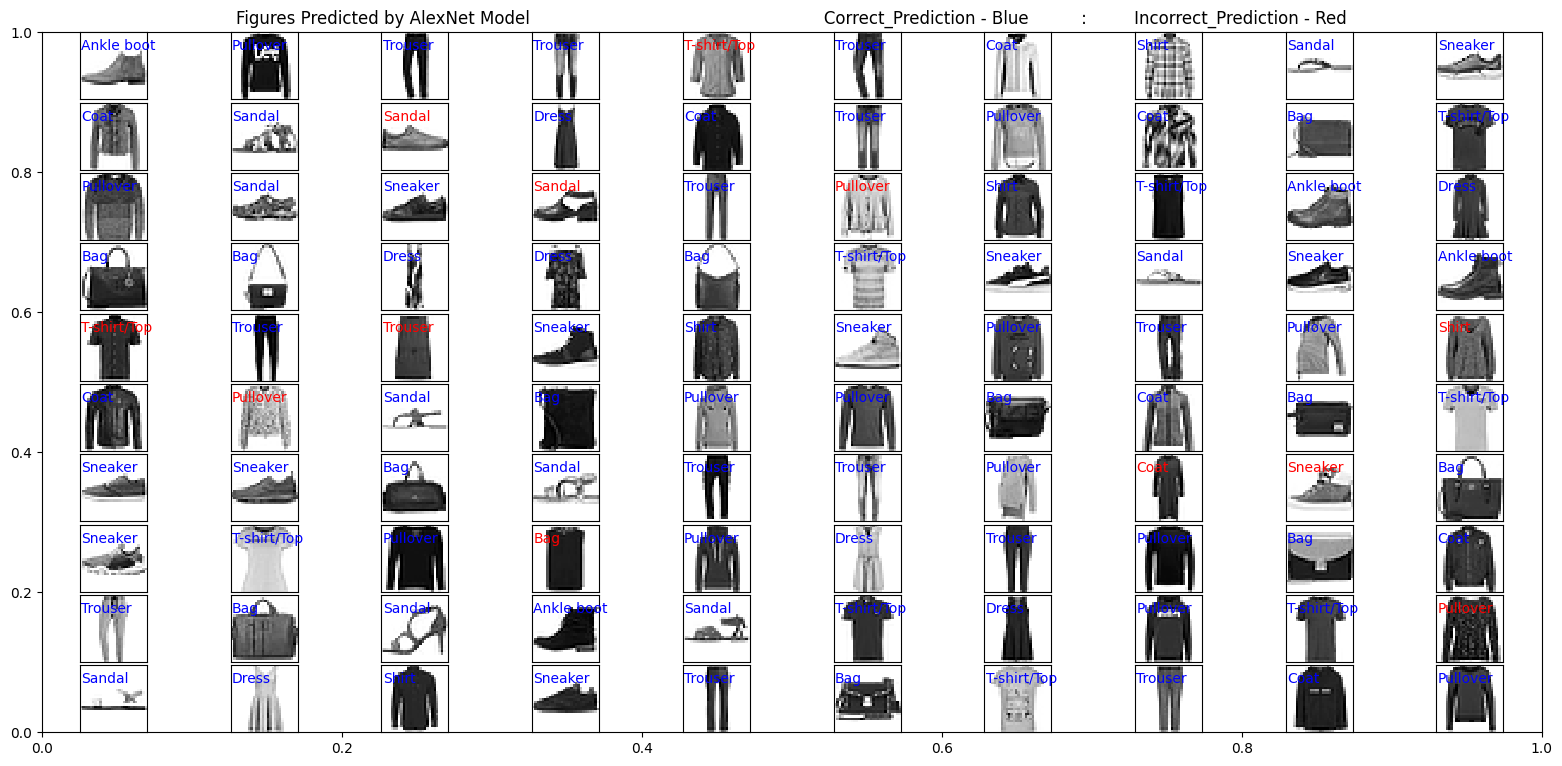

In [86]:
Alex_prediction_val = AlexNet_model.predict(x_test)
# prediction_values = np.argmax(np.round(prediction_values),axis=1)

fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
plt.title('Figures Predicted by AlexNet Model                                                        Correct_Prediction - Blue          :         Incorrect_Prediction - Red')
for i in range(100):
  ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(x_test[i,:].reshape((28,28)),cmap=plt.cm.gray_r, interpolation='nearest')

  if np.argmax(Alex_prediction_val[i]) == np.argmax(y_test[i]):
    ax.text(0, 7, class_names[np.argmax(Alex_prediction_val[i])], color='blue')
  else:
    ax.text(0, 7, class_names[np.argmax(Alex_prediction_val[i])], color='red')

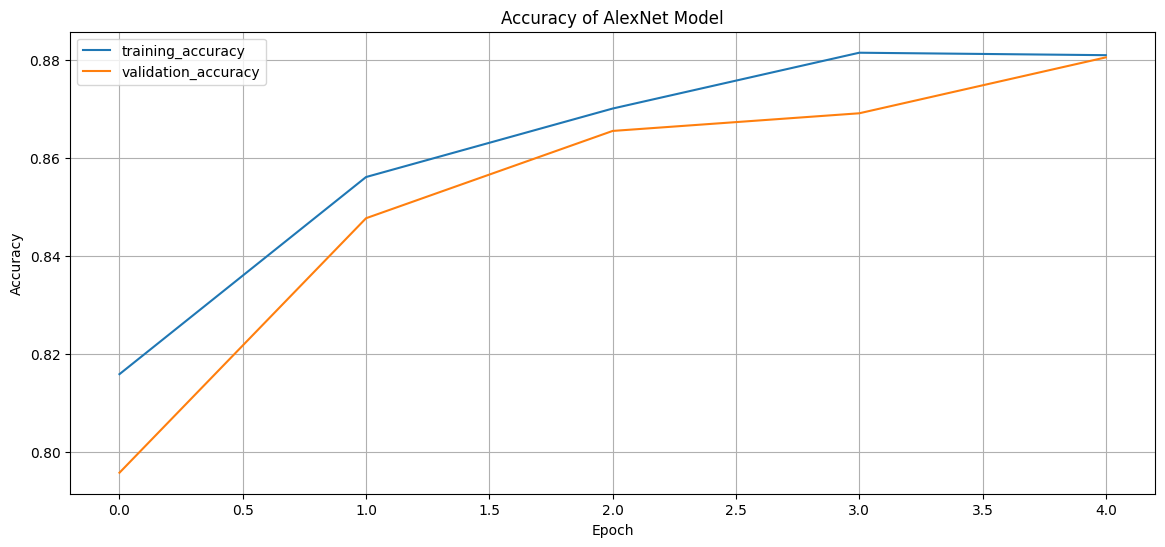

In [87]:
plt.figure(figsize=(14,6))
plt.plot(AlexNet.history['accuracy'])
plt.plot(AlexNet.history['val_accuracy'])
plt.title('Accuracy of AlexNet Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['training_accuracy', 'validation_accuracy'], loc='upper left')
plt.show()

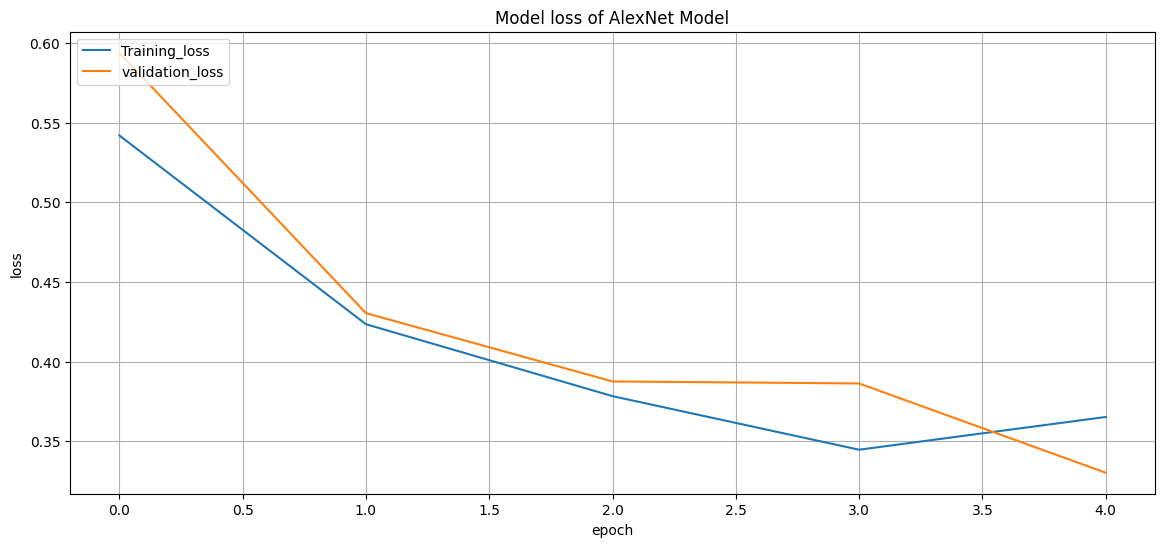

In [88]:
plt.figure(figsize=(14,6))
plt.plot(AlexNet.history['loss'])
plt.plot(AlexNet.history['val_loss'])
plt.title('Model loss of AlexNet Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.legend(['Training_loss', 'validation_loss'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.layers import (Input)

In [89]:
from keras.layers import concatenate

img_a_in = Input(shape=x_train.shape[1:], name="ImageA_Input")
img_b_in = Input(shape=x_train.shape[1:], name="ImageB_Input")

img_a_feat = AlexNet_model(img_a_in)
img_b_feat = AlexNet_model(img_b_in)

combined_features = concatenate([img_a_feat, img_b_feat], name="merge_features")
combined_features = Dense(16, activation="linear")(combined_features)
combined_features = BatchNormalization()(combined_features)
combined_features = Activation("relu")(combined_features)
combined_features = Dense(4, activation="linear")(combined_features)
combined_features = BatchNormalization()(combined_features)
combined_features = Activation("relu")(combined_features)
combined_features = Dense(1, activation="sigmoid")(combined_features)
similarity_model = Model(inputs=[img_a_in, img_b_in], outputs=[combined_features], name="Similarity_Model")

similarity_model.summary()

Model: "Similarity_Model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 ImageA_Input (InputLayer)      [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 ImageB_Input (InputLayer)      [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 sequential (Sequential)        (None, 10)           26505410    ['ImageA_Input[0][0]',           
                                                                  'ImageB_Input[0][0]']           
                                                                                                  
 merge_features (Concatenate)   (None, 20)           0           ['sequential[0][0]

In [90]:
similarity_model.compile(optimizer="adam", loss="binary_crossentropy",
                         metrics=["mae"])

In [91]:
def gen_random_batch(in_groups, batch_halfsize=8):
    out_img_a, out_img_b, out_score = [], [], []
    all_groups = list(range(len(in_groups)))
    for match_group in [True, False]:
        group_idx = np.random.choice(all_groups, size=batch_halfsize)
        out_img_a += [in_groups[c_idx]
                      [np.random.choice(range(in_groups[c_idx].shape[0]))] for c_idx in group_idx]

        if match_group:
            b_group_idx = group_idx
            out_score += [1] * batch_halfsize
        else:
            non_group_idx = [np.random.choice([i for i in all_groups if i != c_idx]) for c_idx in group_idx]
            b_group_idx = non_group_idx
            out_score += [0] * batch_halfsize
        out_img_b += [in_groups[c_idx][np.random.choice(range(in_groups[c_idx].shape[0]))] for c_idx in b_group_idx]

    return np.stack(out_img_a, 0), np.stack(out_img_b, 0), np.stack(out_score, 0)

In [92]:
train_groups = [x_train[np.where(y_train==i)[0]] for i in np.unique(y_train)]
test_groups = [x_test[np.where(y_test==i)[0]] for i in np.unique(y_train)]

In [93]:
print('train groups:', [x.shape[0] for x in train_groups])
print('test groups:', [x.shape[0] for x in test_groups])

train groups: [540000, 60000]
test groups: [90000, 10000]


1/1 [==============================] - 1s 790ms/step


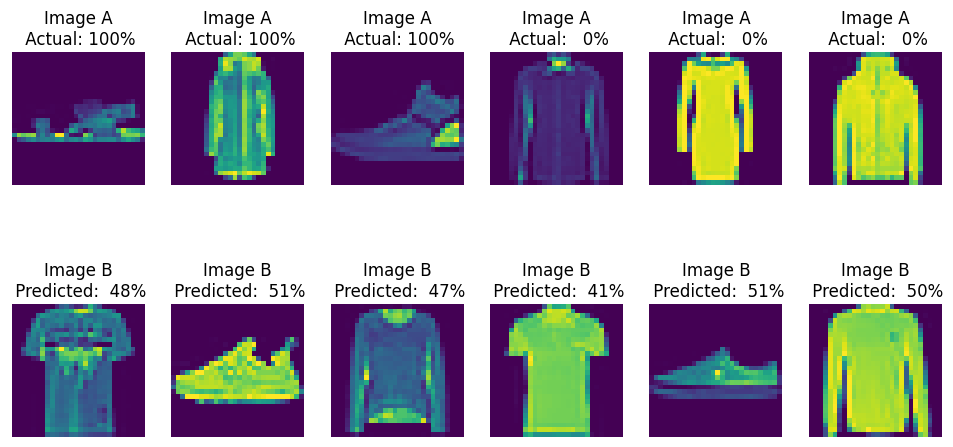

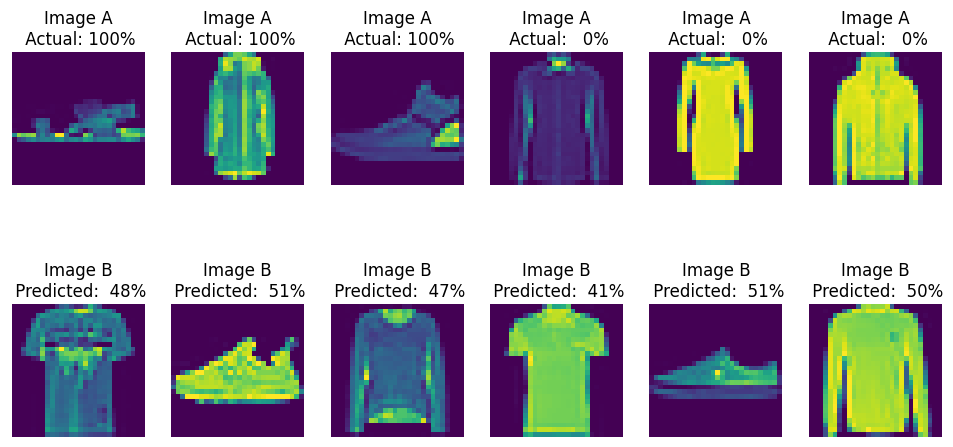

In [95]:
def show_model_output(nb_examples=3):
    pv_a, pv_b, pv_sim = gen_random_batch(test_groups, nb_examples)
    pred_sim = similarity_model.predict([pv_a, pv_b])
    fig, m_axs = plt.subplots(2, pv_a.shape[0], figsize=(12, 6))
    for c_a, c_b, c_d, p_d, (ax1, ax2) in zip(pv_a, pv_b, pv_sim, pred_sim,
                                              m_axs.T):
        ax1.imshow(c_a[:, :, 0])
        ax1.set_title("Image A\n Actual: %3.0f%%" % (100 * c_d))
        ax1.axis("off")
        ax2.imshow(c_b[:, :, 0])
        ax2.set_title("Image B\n Predicted: %3.0f%%" % (100 * p_d))
        ax2.axis("off")
    return fig


# a completely untrained model
show_model_output()

In [37]:
def siam_gen(in_groups, batch_size=32):
    while True:
        pv_a, pv_b, pv_sim = gen_random_batch(train_groups, batch_size // 2)
        yield [pv_a, pv_b], pv_sim


valid_a, valid_b, valid_sim = gen_random_batch(test_groups, 1024)
loss_history = similarity_model.fit_generator(siam_gen(train_groups),
                                              steps_per_epoch=200,
                                              validation_data=([valid_a, valid_b],
                                                               valid_sim),
                                              epochs=5,
                                              verbose=True)

C:\Users\julia.bidak\AppData\Local\Temp\ipykernel_8096\2088002726.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  loss_history = similarity_model.fit_generator(siam_gen(train_groups),


Epoch 1/5
200/200 [==============================] - 1023s 5s/step - loss: 0.7010 - mae: 0.4980 - val_loss: 0.6930 - val_mae: 0.4991
Epoch 2/5
200/200 [==============================] - 620s 3s/step - loss: 0.6974 - mae: 0.5005 - val_loss: 0.6944 - val_mae: 0.5000
Epoch 3/5
200/200 [==============================] - 665s 3s/step - loss: 0.6938 - mae: 0.5000 - val_loss: 0.6956 - val_mae: 0.5000
Epoch 4/5
200/200 [==============================] - 581s 3s/step - loss: 0.6932 - mae: 0.5000 - val_loss: 0.6955 - val_mae: 0.5000
Epoch 5/5
200/200 [==============================] - 546s 3s/step - loss: 0.6931 - mae: 0.5000 - val_loss: 0.6935 - val_mae: 0.5000


1/1 [==============================] - 0s 400ms/step


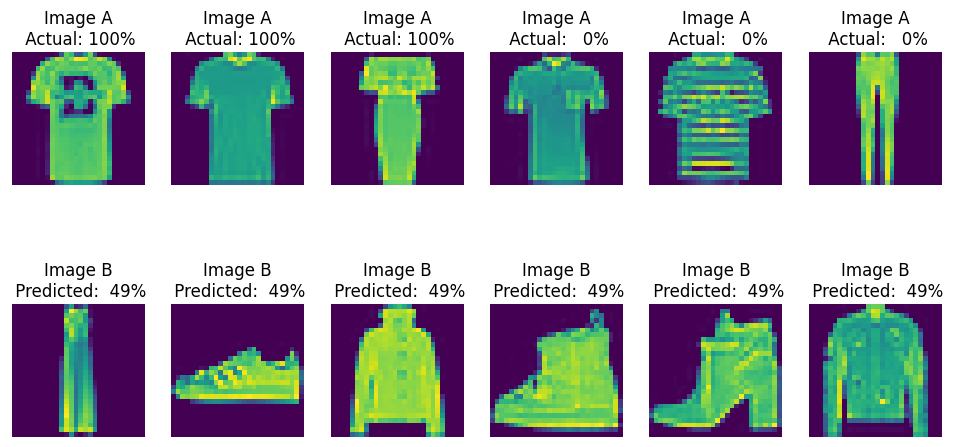

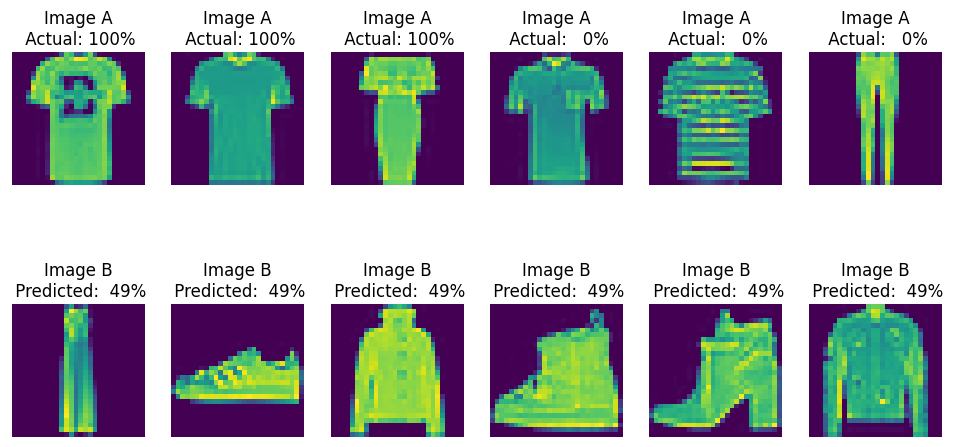

In [38]:
show_model_output()

In [109]:
from sklearn.manifold import TSNE
x_test_features = AlexNet_model.predict(x_test, verbose = True, batch_size=128)

tsne_obj = TSNE(n_components=2,
    init='pca',
    random_state=101,
    method='barnes_hut',
    n_iter=500,
    verbose=1)
tsne_features = tsne_obj.fit_transform(x_test_features)

79/79 [==============================] - 6s 75ms/step
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.030s...
[t-SNE] Computed neighbors for 10000 samples in 0.408s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.721237
[t-SNE] KL divergence aft

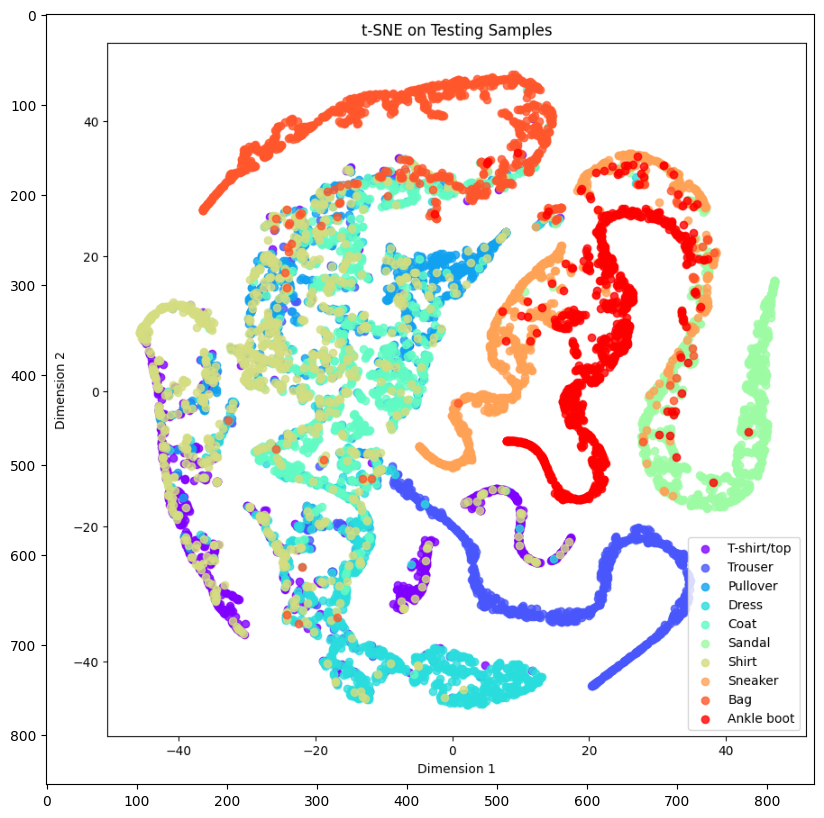

In [116]:
import numpy as np
from matplotlib import pyplot as plt

obj_categories = [
                    'T-shirt/top','Trouser','Pullover','Dress',
                    'Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'
                 ]
colors = plt.cm.rainbow(np.linspace(0, 1, 10))
plt.figure(figsize=(10, 10))

for c_group, (c_color, c_label) in enumerate(zip(colors, obj_categories)):
    plt.scatter(tsne_features[np.where(y_test == c_group), 0],
        tsne_features[np.where(y_test == c_group), 1],
        marker='o',
        color=c_color,
        linewidth=1,
        alpha=0.8,
        label=c_label)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE on Testing Samples')
plt.legend(loc='best')
plt.savefig('clothes_dist.png')
plt.show(block=False)